<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Figures-for-divergence-timing-manuscript." data-toc-modified-id="Figures-for-divergence-timing-manuscript.-1">Figures for divergence timing manuscript.</a></span><ul class="toc-item"><li><span><a href="#Notebook-Setup" data-toc-modified-id="Notebook-Setup-1.1">Notebook Setup</a></span><ul class="toc-item"><li><span><a href="#Load-packages" data-toc-modified-id="Load-packages-1.1.1">Load packages</a></span></li><li><span><a href="#Colors" data-toc-modified-id="Colors-1.1.2">Colors</a></span></li></ul></li><li><span><a href="#Decay-to-stationary-state" data-toc-modified-id="Decay-to-stationary-state-1.2">Decay to stationary state</a></span></li><li><span><a href="#Substitution-model-comparison" data-toc-modified-id="Substitution-model-comparison-1.3">Substitution model comparison</a></span><ul class="toc-item"><li><span><a href="#$\Gamma$-distribution-plot" data-toc-modified-id="$\Gamma$-distribution-plot-1.3.1">$\Gamma$-distribution plot</a></span></li></ul></li><li><span><a href="#Logoplots" data-toc-modified-id="Logoplots-1.4">Logoplots</a></span><ul class="toc-item"><li><span><a href="#Doud-logoplots" data-toc-modified-id="Doud-logoplots-1.4.1">Doud logoplots</a></span></li><li><span><a href="#Lee-logoplots" data-toc-modified-id="Lee-logoplots-1.4.2">Lee logoplots</a></span></li></ul></li></ul></li></ul></div>

# Figures for divergence timing manuscript. 

Below is the code to generate the un-edited versions of the figures for the divergence timing manuscript.   
The final verisons can be found in `figures.pptx`. 

## Notebook Setup

### Load packages

Here are the packages I used to create the figures and their associated references: 

1. [`ggplot2`](https://cran.r-project.org/web/packages/ggplot2/citation.html)
2. [`cowplot`](https://github.com/wilkelab/cowplot)

In [1]:
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



### Colors 

In [3]:
black = "black"
blue = "#439FC3"
green = "#76A88D"
orange = "#F9842A"
red = "#B52A24"
pink = "#CC79A7"
purple = "#8E7790"

## Decay to stationary state 

This plot shows the decay to stationary state for 4 different models: 

1. GY94 (YNGKP M0)
2. GY94 + $\Gamma\omega$ (YNGKP M5)
3. GY94 + $\omega_r$
4. ExpCM 

I picked 5 sites to represent different behaviors of the model.

    site         wr
23    23 0.10062973
51    51 0.28204937
81    81 0.02981196
90    90 0.39609981
490  490 0.09206218


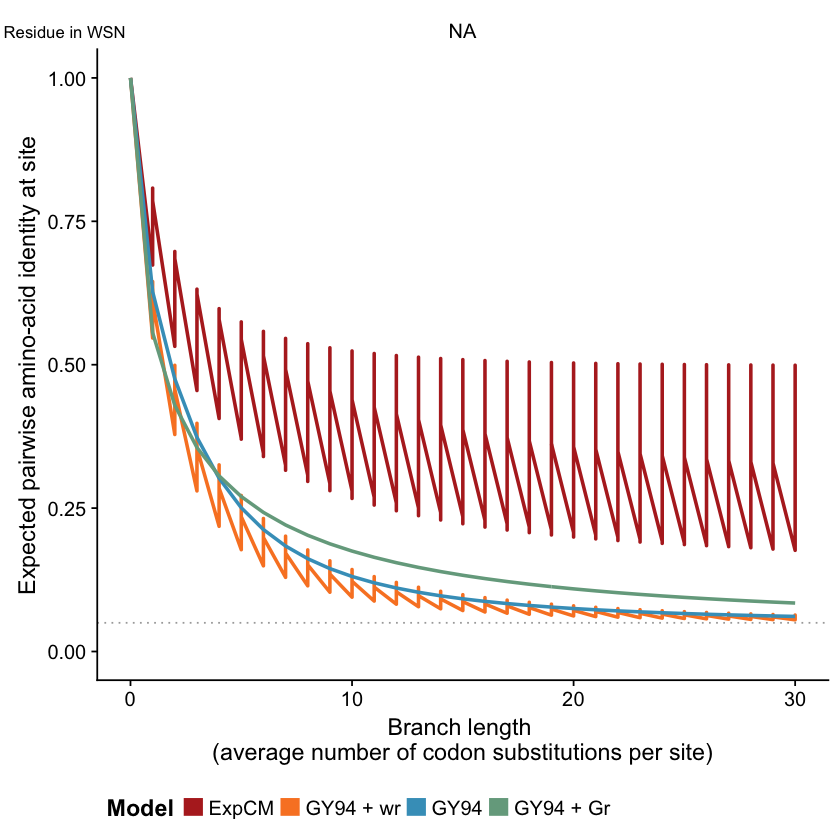

In [8]:
df = read.csv("../../analysis/decay_to_stationary/expected_identity_given_time_t.csv")
targets = c(90,51,23,490,81) # sites to include in the plot
time = 30 # width of the x-axis 
df = df[is.element(df$Site, targets),]

myColors <- c(red, orange, blue, green)
fillScale <- scale_fill_manual(name = "Model", values = myColors)
colorScale <- scale_color_manual(name = "Model", values = myColors)

df$Site_f = factor(df$Site, levels=targets)
df$Model = factor(df$Model, levels = c("ExpCM", "GY94 + wr", "GY94", "GY94 + Gr"))

df <- df[which(df[,3]<=time),]

p <- ggplot(df, aes(Time,f,color=Model)) + geom_line(size=1.0) + ylim(0,1.0) 
p <- p + facet_grid(~Site_f) + geom_hline(yintercept = 0.05, color = "darkgrey", linetype = "dotted")
p <- p + theme(strip.background = element_blank(), legend.position = "bottom", legend.title= element_text(face="bold"))
p <- p + xlab("Branch length \n(average number of codon substitutions per site)") + ylab("Expected pairwise amino-acid identity at site")
p <- p + colorScale + guides(colour = guide_legend(override.aes = list(size=5)))
ggdraw(p) + draw_label("Residue in WSN", x = 0.15, y = 0.97, vjust = 1, hjust = 1, size = 10)
ggsave("decay.png", width=9, height=5)

wr = read.csv("../../analysis/decay_to_stationary/spielman_wr.csv")
wr = wr[is.element(wr$site, targets),]
print(wr)

## Substitution model comparison

Below is the code to make figure to compare the different substitution models. This figure has three pieces:  

1. Short stretches of logoplot to compare stationary states 
2. Plot of $\Gamma$-distribution for rate variation 
3. Feature comparison for the four models in the paper

### $\Gamma$-distribution plot

Warning message:
“Ignoring unknown parameters: df”

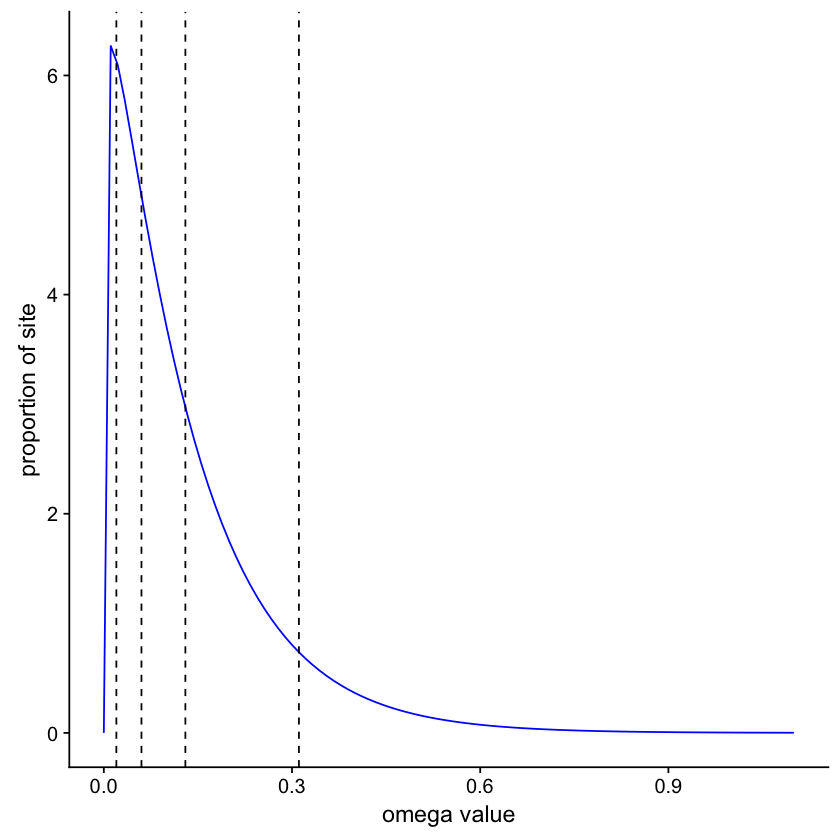

In [28]:
x <- seq(0,1.1,length=100)
y <- dgamma(x, 1.09, 8.14)
means = c(0.02,0.06,0.13,0.311)
means = data.frame(means)
df  <- data.frame(x,y)

p <- ggplot(df, aes(x,y)) + geom_line(color="blue") + geom_vline(df= means, aes(xintercept = means), linetype="dashed")
p <- p + xlab("omega value") + ylab("proportion of site")
p

## Logoplots

Below is the code to make the logoplots representing the deep mutational scanning preferences from Mike's H1 WSN scan ([doud2016accurate](http://www.mdpi.com.offcampus.lib.washington.edu/1999-4915/8/6/155)) and Juhye's H3 Perth/09 scan ([lee2017Perth]()).

The logoplots are created [`phydm_logoplot`](http://jbloomlab.github.io/phydms/phydms_logoplot.html).

### Doud logoplots

In [15]:
cmd = "phydms_logoplot prefs_doud.pdf --prefs ../../analysis/HA/data/references/HA_Doud_prefs.csv --stringency 1.52 --nperline 113"
system(cmd, intern=TRUE)

[1] ""                                                                                                                                                                     
 [2] "Beginning execution of phydms_logoplot in directory /Users/sarah/Google Drive/GS/lab/divergence_timing_manuscript/manuscript/figures at time Wed Dec 13 16:53:03 2017"
 [3] ""                                                                                                                                                                     
 [4] "Version information:"                                                                                                                                                 
 [5] "\tTime and date: Wed Dec 13 16:53:03 2017"                                                                                                                            
 [6] "\tPlatform: Darwin-15.6.0-x86_64-i386-64bit"                                                                                                                          
 [7] "\tPython version: 3.5.2 (v3.5.2:4def2a2901a5, Jun 26 2016, 10:47:25)  [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]"                                                    
 [8] "\tphydms version: 2.2.0"                                                                                                                                              
 [9] "\tBio version: 1.68"                                                                                                                                                  
[10] "\tcython version: 0.27.3"                                                                                                                                             
[11] "\tnumpy version: 1.13.3"                                                                                                                                              
[12] "\tscipy version: 0.19.0"                                                                                                                                              
[13] "\tmatplotlib version: 2.0.2"                                                                                                                                          
[14] "\tnatsort version: 5.1.1"                                                                                                                                             
[15] "\tsympy version: 1.0"                                                                                                                                                 
[16] "\tsix version: 1.10.0"                                                                                                                                                
[17] "\tpandas version: 0.20.3"                                                                                                                                             
[18] "\tpyvolve version: 0.8.4"                                                                                                                                             
[19] "\tstatsmodels version: 0.8.0"                                                                                                                                         
[20] "\tweblogolib version: 3.5.0"                                                                                                                                          
[21] "\tPyPDF2 version: 1.26.0"                                                                                                                                             
[22] ""                                                                                                                                                                     
[23] "Parsed the following command-line arguments:"                                                                                                                         
[24] "\tdiffprefs = No

### Lee logoplots

In [16]:
cmd = "phydms_logoplot prefs_lee.pdf --prefs ../../analysis/HA/data/references/HA_Lee_prefs.csv --stringency 1.78 --nperline 113"
system(cmd, intern=TRUE)

[1] ""                                                                                                                                                                     
 [2] "Beginning execution of phydms_logoplot in directory /Users/sarah/Google Drive/GS/lab/divergence_timing_manuscript/manuscript/figures at time Wed Dec 13 16:53:13 2017"
 [3] ""                                                                                                                                                                     
 [4] "Version information:"                                                                                                                                                 
 [5] "\tTime and date: Wed Dec 13 16:53:13 2017"                                                                                                                            
 [6] "\tPlatform: Darwin-15.6.0-x86_64-i386-64bit"                                                                                                                          
 [7] "\tPython version: 3.5.2 (v3.5.2:4def2a2901a5, Jun 26 2016, 10:47:25)  [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]"                                                    
 [8] "\tphydms version: 2.2.0"                                                                                                                                              
 [9] "\tBio version: 1.68"                                                                                                                                                  
[10] "\tcython version: 0.27.3"                                                                                                                                             
[11] "\tnumpy version: 1.13.3"                                                                                                                                              
[12] "\tscipy version: 0.19.0"                                                                                                                                              
[13] "\tmatplotlib version: 2.0.2"                                                                                                                                          
[14] "\tnatsort version: 5.1.1"                                                                                                                                             
[15] "\tsympy version: 1.0"                                                                                                                                                 
[16] "\tsix version: 1.10.0"                                                                                                                                                
[17] "\tpandas version: 0.20.3"                                                                                                                                             
[18] "\tpyvolve version: 0.8.4"                                                                                                                                             
[19] "\tstatsmodels version: 0.8.0"                                                                                                                                         
[20] "\tweblogolib version: 3.5.0"                                                                                                                                          
[21] "\tPyPDF2 version: 1.26.0"                                                                                                                                             
[22] ""                                                                                                                                                                     
[23] "Parsed the following command-line arguments:"                                                                                                                         
[24] "\toutfile = pref